In [1]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Preprocesamiento

### Nodo temporal

In [35]:

def nodoTemporal(leer_video):
  cap = cv.VideoCapture(leer_video)
  video_R = []
  video_G = []
  video_B = []

  while cap.isOpened():
      ret, frame = cap.read()

      if not ret:
          break

      video_R.append(frame[:,:,2])
      video_G.append(frame[:,:,1])
      video_B.append(frame[:,:,0])

  video_R = np.array(video_R, dtype=np.uint8)
  video_G = np.array(video_G, dtype=np.uint8)
  video_B = np.array(video_B, dtype=np.uint8)

  M = np.zeros((int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), 3), dtype=np.uint8)

  for y in range(M.shape[0]):
      for x in range(M.shape[1]):
          M[y,x,0] = np.argmax(np.bincount(video_R[:,y,x]))
          M[y,x,1] = np.argmax(np.bincount(video_G[:,y,x]))
          M[y,x,2] = np.argmax(np.bincount(video_B[:,y,x]))

  cap.release()
  return M



In [8]:
prueba = nodoTemporal('output2.avi')

Can't receive frame (stream end?). Exiting ...


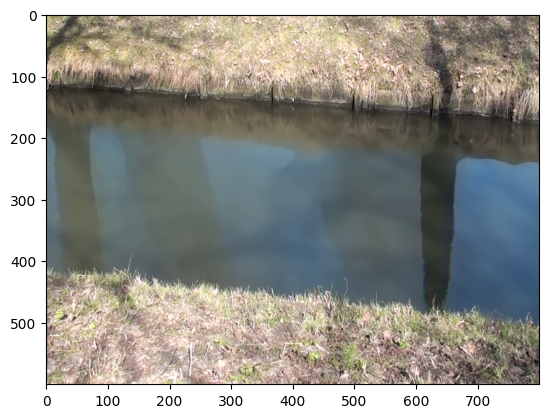

In [9]:
plt.imshow(prueba)
plt.show()

## Videos residuales

In [38]:
def residual(ruta_video, ruta_output):

  leer_video = cv.VideoCapture(ruta_video, cv.CAP_FFMPEG)
  temp = nodoTemporal(ruta_video).astype(np.int16)
  output_path = ruta_output

  ancho = int(leer_video.get(cv.CAP_PROP_FRAME_WIDTH))
  altura = int(leer_video.get(cv.CAP_PROP_FRAME_HEIGHT))
  fps = leer_video.get(cv.CAP_PROP_FPS)
  fourcc = cv.VideoWriter_fourcc(*'XVID')
  codec = fourcc

  out = cv.VideoWriter(output_path, codec, fps, (ancho, altura))

  while leer_video.isOpened():
    ret, frame = leer_video.read()

    if not ret:
      break

    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB).astype(np.int16)
    res = np.abs(frame-temp).astype(np.uint8)
    res = cv.cvtColor(res, cv.COLOR_RGB2BGR)

    out.write(res)
    
  leer_video.release()
  out.release()

Obtenemos los videos residuales de cada video del dataset

In [ ]:
from pathlib import Path

pathlist = Path(r"**PATH_TO_VIDEO_DATABASE**").rglob('*.avi')

for path in pathlist:

    if path.is_file():
        print(path)
        output_path = path.parent / f"residual_{path.name}" 
        residual(path, output_path)

    